<p align="center">
  <img src="assets/pokemon-center.gif" alt="PKCenter" width="300"/>
</p>

In [2]:
# Checkpoint to begin loading the Showdown data set

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as sp

gen5_types_df = pd.read_csv("./dataset/pokemon-fandom/pokemon_gen5_types_fixed.csv")
gen5_stats_df = pd.read_csv(r"dataset/bulbagarden/pokemon_gen5_stats.csv")
showdown_df = pd.read_csv("showdown.csv")
unique_pokemons_df = pd.read_csv("unique_pokemons.csv")
gen5ou_usage_df = pd.read_csv("gen5ou_usage.csv")


## Multiple Groups Similarity test

In this test we aim to determine if the pokemon usage of each ELO range group is different from one another. This is to determine if the teambuilding strategies differ when a player is just starting off, has a moderate level of experience, or is a really skilled player. 

The ELO ranges differ for different formats of competitive pokemon. For example, in the latest OU format, Generation 9, what is generally considered a high skill ELo is from the ranges of 1900 to 2000. In Generation 5 OU however, what is considered to be high skill is from more or less 1500 to 1700 or 2000 since the population of players is less, the format generally caps at 1700. For the sake of this test however, we will consider for those that are above 1700 since it is not outside the realm of possibility.

The groups chosen is as follows:
- 1000-1290
- 1291-1390
- 1391-1490
- 1491-2000

This is to mimic the usual 4 tiers of smogon uses which are 1000, 1530, 1630, and 1730 but is compressed since the afforementioned lower player population results to an ELO ceiling closer to 1700.

### Pre-processing

Before any processing, we first build a dataframe containing the groups of ELO as columns each with their raw and percentage values with the pokemon as the rows. 

In [3]:
usage_elo_df = unique_pokemons_df
elo_ranges = ["1000-1290", "1291-1390", "1391-1490", "1491-2000"]

for elo_range in elo_ranges:
    usage_elo_df[elo_range + " raw"] = 0
    usage_elo_df[elo_range + " percent"] = 0
usage_elo_df

,pokemon,1000-1290 raw,1000-1290 percent,1291-1390 raw,1291-1390 percent,1391-1490 raw,1391-1490 percent,1491-2000 raw,1491-2000 percent
0,Amoonguss,0,0,0,0,0,0,0,0
1,Sableye,0,0,0,0,0,0,0,0
2,Sawsbuck,0,0,0,0,0,0,0,0
3,Honchkrow,0,0,0,0,0,0,0,0
4,Ferrothorn,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
199,Electrode,0,0,0,0,0,0,0,0
200,Nidoqueen,0,0,0,0,0,0,0,0
201,Sigilyph,0,0,0,0,0,0,0,0
202,Umbreon,0,0,0,0,0,0,0,0


After the setup, we will then now get the usage rating of each pokemon by going through every team in the `showdown_df` dataframe containing the scraped teams from Gen 5 OU. Iterating over each pokemon in each team revealed the raw counts of the pokemon's usage.

In [4]:
for row in showdown_df.itertuples():
    elo = showdown_df.at[row.Index, "Elo"]
    
    elo_range = ""
    if elo > 1490:
        elo_range = "1491-2000"
    elif elo > 1390:
        elo_range = "1391-1490"
    elif elo > 1290:
        elo_range = "1291-1390"
    else:
        elo_range = "1000-1290"
        
        
    for i in range(1, 7):
        pkmn_name = showdown_df.loc[row.Index, f"Pokemon {i}"]
        usage_elo_df.loc[usage_elo_df["pokemon"] == pkmn_name, elo_range + " raw"] += 1
usage_elo_df

,pokemon,1000-1290 raw,1000-1290 percent,1291-1390 raw,1291-1390 percent,1391-1490 raw,1391-1490 percent,1491-2000 raw,1491-2000 percent
0,Amoonguss,3,0,41,0,25,0,17,0
1,Sableye,2,0,5,0,8,0,0,0
2,Sawsbuck,0,0,0,0,1,0,0,0
3,Honchkrow,1,0,2,0,3,0,0,0
4,Ferrothorn,25,0,287,0,160,0,50,0
...,...,...,...,...,...,...,...,...,...
199,Electrode,0,0,1,0,0,0,0,0
200,Nidoqueen,0,0,2,0,0,0,0,0
201,Sigilyph,0,0,5,0,0,0,1,0
202,Umbreon,2,0,5,0,2,0,0,0


After that, the percentages are solved in the `{elo_range} percent` column.

In [5]:
for elo_range in elo_ranges:
    total = usage_elo_df[elo_range + " raw"].sum()
    usage_elo_df[elo_range + " percent"] = usage_elo_df[elo_range + " raw"] / total * 100
usage_elo_df

,pokemon,1000-1290 raw,1000-1290 percent,1291-1390 raw,1291-1390 percent,1391-1490 raw,1391-1490 percent,1491-2000 raw,1491-2000 percent
0,Amoonguss,3,0.454545,41,0.694444,25,0.805932,17,1.582868
1,Sableye,2,0.303030,5,0.084688,8,0.257898,0,0.000000
2,Sawsbuck,0,0.000000,0,0.000000,1,0.032237,0,0.000000
3,Honchkrow,1,0.151515,2,0.033875,3,0.096712,0,0.000000
4,Ferrothorn,25,3.787879,287,4.861111,160,5.157963,50,4.655493
...,...,...,...,...,...,...,...,...,...
199,Electrode,0,0.000000,1,0.016938,0,0.000000,0,0.000000
200,Nidoqueen,0,0.000000,2,0.033875,0,0.000000,0,0.000000
201,Sigilyph,0,0.000000,5,0.084688,0,0.000000,1,0.093110
202,Umbreon,2,0.303030,5,0.084688,2,0.064475,0,0.000000


### Identifying the Statistical Test

To identify which multiple means test is appropriate, a Shapiro-Wilks test would be done to identify if the groups are normally distributed or not while the levene's test will be done to see if the variances of our groups are the same. Knowing if our sample is normally distributed and have equal variances will help us decide in which test we would do whether it would be parametric or not.


#### Shapiro-Wilks and Q-Q plot

The Shapiro Wilks Test of Normality is a test that determines if a given list of values is normally distributed or not, in this case it would be the usage rating of our ELO groups. 

The hypothesis is as follows:
* $H_0$: The data is normally distributed
* $H_a$: The data is not normally distributed

We set a significance level of $a = 0.05$. As such, we will reject the null hypothesis if the $p$ value reaches below this threshold.

Additionally, a Q-Q Plot is done to visualize if the groups showcase a normal distribution or not.

Shapiro-Wilk test 1000-1290: stat=0.5600170552018435, p=1.8970652961682416e-22
Reject H0: The group is likely not normal


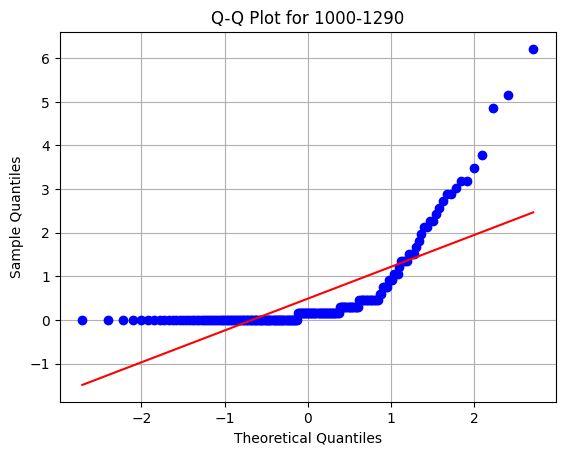

Shapiro-Wilk test 1291-1390: stat=0.5379253711143102, p=6.254748790470104e-23
Reject H0: The group is likely not normal


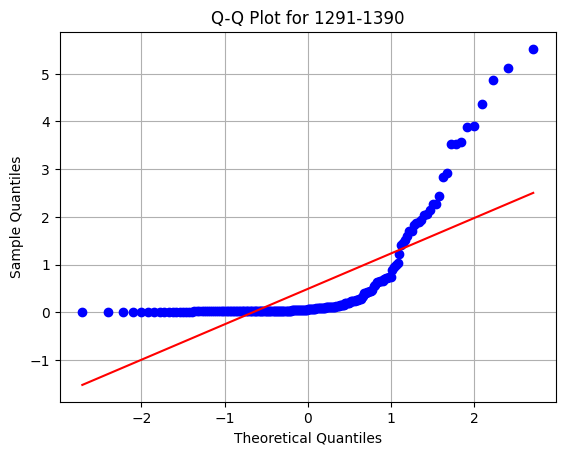

Shapiro-Wilk test 1391-1490: stat=0.5273620837701019, p=3.7328310262572893e-23
Reject H0: The group is likely not normal


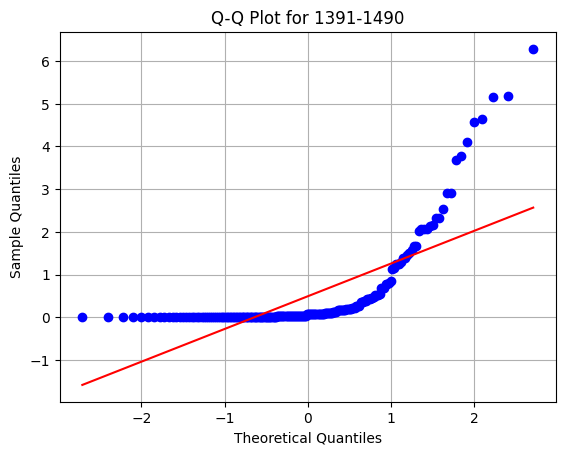

Shapiro-Wilk test 1491-2000: stat=0.5138679525923513, p=1.9553226049823525e-23
Reject H0: The group is likely not normal


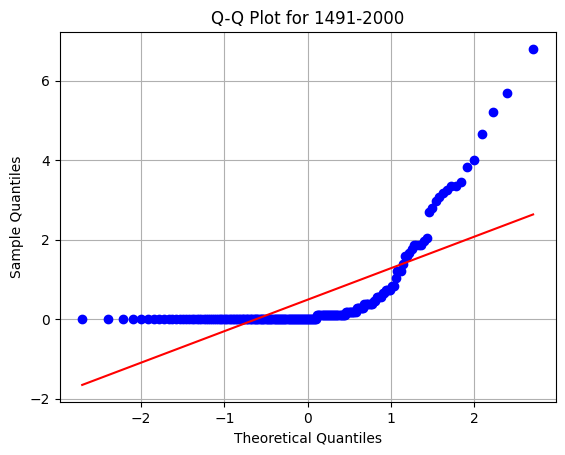

In [16]:
for elo_range in elo_ranges:
    data = usage_elo_df[f"{elo_range} percent"]
    
    # Ben Shapiro
    stat, p = sp.shapiro(data)
    print(f"Shapiro-Wilk test {elo_range}: stat={stat}, p={p}")
    if p > 0.05:
        print("Accept H0: The group is likely normal")
    else:
        print("Reject H0: The group is likely not normal")
        
    # Q-Q plot
    sp.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {elo_range}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

As seen in the Shapiro-Wilks test and Q-Q plot, the groups are all not normally distributed, which will make the Analysis of Variance less robust or less applicable.

#### Levene's Test

Levene's test is used to assess the homogeneity of variances (also known as homoscedasticity) across groups, in this case, the groups would be the different ELO ranges. This is commonly used before conducting an ANOVA, as it is one of it's requirements.

The Hypothesis are as follows
- **Null hypothesis $H_{0}$**: All group variances are equal. $ H_{0}: \sigma_1^2 = \sigma_2^2 = \cdots = \sigma_k^2 $

- **Alternative hypothesis $H_{a}$**: At least one group has a different variance. $ H_{a}: \exists \, i, j \text{ such that } \sigma_i^2 \ne \sigma_j^2 $

In [17]:
usage_percent_elo = []
for elo_range in elo_ranges:
    usage_percent_elo.append(usage_elo_df[f"{elo_range} percent"])

stat, p = sp.levene(usage_percent_elo[0], usage_percent_elo[1], usage_percent_elo[2], usage_percent_elo[3])
print(f"Levene's test: stat={stat}, p={p}")
if p > 0.05:
    print("Accept H0: The groups likely have equal variances")
else:
    print("Reject H0: The groups likely do not have equal variances")

Levene's test: stat=0.01791569872172893, p=0.9967361166053423
Accept H0: The groups likely have equal variances


As seen from the results of the Levene's test, the usage percentages of the pokemon in the groups are likely to have the same variances of that from the other groups.

### Kruskal-Wallis H Test

The Kruskal-Wallis H-test is a non-parametric alternative to one-way ANOVA according to Kruskal Wallis himself in his journal "Use of ranks in one-criterion variance analysis". We will be utilizing this since one of the factors that ANOVA relied on, the data being normally distributed, is not present within the data.

Solving for it would require to combine all data to be ranked from smallest to largest, then computing for the sum of ranks ($R_i$) for each group $i$. And then all plugged into the formula:

$\begin{align}
H = \frac{12}{N(N+1)} \sum_{i=1}^{k} \frac{R_i^2}{n_i} - 3(N+1)
\end{align}$

Where:
- $ H $ = Kruskal-Wallis test statistic  
- $ N $ = total number of observations  
- $ k $ = number of groups  
- $ R_i $ = sum of ranks for group $ i $  
- $ n_i $ = number of observations in group $ i $

The hypothesis is as follows:

> **Null hypothesis $H_{0}$**
- All group medians are equal. The distributions are identical across groups

> **Alternative hypothesis $H_{a}$**
- At least one group differs in distribution. One or more group's median differ from the others.

The function `kruskal()` exists under `scipy.stats` and will be utilized to solve for the p-value.

In [20]:
stat, p = sp.kruskal(usage_percent_elo[0], usage_percent_elo[1], usage_percent_elo[2], usage_percent_elo[3])
print(f"Kruskal's test: stat={stat}, p={p}")
if p > 0.05:
    print("Accept H0: The groups likely have equal medians")
else:
    print("Reject H0: The groups likely do not have equal medians")

Kruskal's test: stat=19.658833296264717, p=0.00019974100624276498
Reject H0: The groups likely do not have equal medians


From the result of the Kruskal-Wallis H-test, we reject the null hypothesis meaning at least one group differs from one other group. To identify which group this is, we would need to do a post-hoc test akin to a Tukey-Kramer test for ANOVA, but non-parametric in nature.

### Dunn's Test

Dunn’s test is a non-parametric post hoc test by Olive Jean Dunn used after a significant Kruskal-Wallis test to identify which specific groups differ proposed in the journal "Multiple comparisons using rank sums". This test will determine which pairs of ELO groups are different.

The pairwise hypothesis is as follows:

- **Null hypothesis $H_{0}$**: The medians of the two groups are equal.

- **Alternative hypothesis $H_{a}$**: The medians of the two groups are different.

However, conducting a 0.05 significance test multiple times may introduce larger Type I error probability. With this in mind, a Bonferroni significance correction will be applied.

The Dunn's Test can be done through the module `scikit_posthocs` with the function `posthoc_dunn(data, correction)` which already includes what kind of correction would be done.

In [21]:
import scikit_posthocs as scik

data = [usage_percent_elo[i] for i in range(4)]

p_values = scik.posthoc_dunn(data, p_adjust='bonferroni')

labels = ['1000-1290', '1291-1390', '1391-1490', '1491-2000']
p_values.columns = labels
p_values.index = labels

print(p_values)
print("")
print(p_values < 0.05)

           1000-1290  1291-1390  1391-1490  1491-2000
1000-1290   1.000000   0.114951   1.000000   0.220790
1291-1390   0.114951   1.000000   0.117831   0.000056
1391-1490   1.000000   0.117831   1.000000   0.215833
1491-2000   0.220790   0.000056   0.215833   1.000000

           1000-1290  1291-1390  1391-1490  1491-2000
1000-1290      False      False      False      False
1291-1390      False      False      False       True
1391-1490      False      False      False      False
1491-2000      False       True      False      False


From the results of the Dunn's test, we can see that only 1 pair seems to differ and that would be ELO range 1291-1390 and ELO range 1491-2000.

In [27]:
for elo_range in elo_ranges:
    total = usage_elo_df[elo_range + " raw"].sum()
    print(f"{elo_range}: {total/6}")

1000-1290: 110.0
1291-1390: 984.0
1391-1490: 517.0
1491-2000: 179.0


<p align="center">
<a href="https://pokemondb.net/pokedex/pikachu"><img src="https://img.pokemondb.net/sprites/black-white/anim/normal/pikachu.gif" alt="Pikachu" style="width: 65px;"></a>
<a href="https://pokemondb.net/pokedex/pignite"><img src="https://img.pokemondb.net/sprites/black-white-2/anim/normal/pignite.gif" alt="Pignite" style="width: 80px;"></a>
<a href="https://pokemondb.net/pokedex/zoroark"><img src="https://img.pokemondb.net/sprites/black-white/anim/normal/zoroark.gif" alt="Zoroark"
style="width: 120px;"></a>
<a href="https://pokemondb.net/pokedex/reshiram"><img src="https://img.pokemondb.net/sprites/black-white/anim/normal/reshiram.gif" alt="Reshiram" style="width: 150px;"></a>
</p>

### Results and Discussion

The only pairwise inequality may be a byproduct of the 1291-1300 group having almost 6 times as much teams as 1491-2000. The inequal team distribution and the high team count within ELO range 1291-1300 may contribute to the emphasis of the difference between these two groups.

Assuming that the data set of ELO follows their skill level ie. no player is using a lower ELO account despite having a skill level, this result may indicate that the teambuilding within different ELO groups are mostly similar save for the ELO range of 1291 to 1300 and 1491 to 2000 insinuating that, the teambuilding of above beginner tiers of players differ with that of the teambuilding of high skilled players. 